In [1]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import os
import re
import numpy as np
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
data = pd.read_csv('Cleaned_Resumes.csv')
data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu https www linkedin com anandguda...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,srikanth workday hcm consultant seeking suitab...
76,Workday,workday hcm fcm name kumar role workday consul...
77,Workday,venkateswarlu workday consultant professional ...


In [5]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [6]:
data

,Category,Resume_Details
0,0,anubhav kumar singh core competencies scriptin...
1,0,ananda rayudu https www linkedin com anandguda...
2,0,peoplesoft database administrator gangareddy p...
3,0,classification internal classification interna...
4,0,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,3,workday integration consultant name sri krishn...
75,3,srikanth workday hcm consultant seeking suitab...
76,3,workday hcm fcm name kumar role workday consul...
77,3,venkateswarlu workday consultant professional ...


In [7]:
requiredText = data['Resume_Details'].values
requiredTarget = data['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=45, test_size=0.30,stratify=requiredTarget)
X_train.shape, X_test.shape

((55, 4258), (24, 4258))

In [9]:
from sklearn.metrics import classification_report

## Logistic Regression

In [10]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [11]:
predict1 = lg.predict(X_test)

In [12]:
accuracy_1 = accuracy_score(y_test,predict1)
accuracy_1

0.9166666666666666

In [13]:
cm = confusion_matrix(y_test,predict1)
cm


array([[5, 1, 0, 0],
       [0, 7, 0, 0],
       [0, 1, 3, 0],
       [0, 0, 0, 7]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

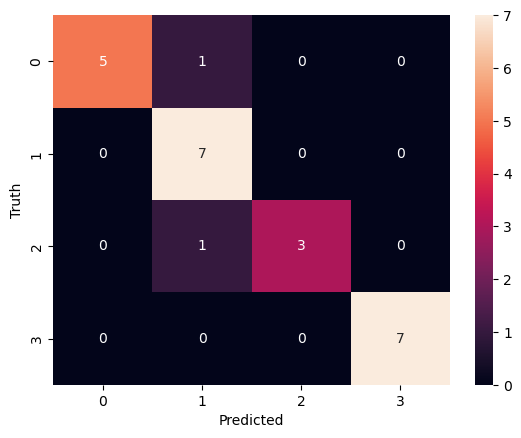

In [14]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [15]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.78      1.00      0.88         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7

    accuracy                           0.92        24
   macro avg       0.94      0.90      0.91        24
weighted avg       0.94      0.92      0.92        24



In [16]:
accuracy_1 = round(accuracy_score(y_test,predict1),4)
precision_1 = round(precision_score(y_test,predict1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,predict1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,predict1, average = 'macro'),4)

In [17]:

print('Accuracy Score  : ', accuracy_1)
print('Precision Score : ', precision_1)
print('Recall Score    : ', recall_1)
print('f1-Score        : ', f1_1)

Accuracy Score  :  0.9167
Precision Score :  0.9444
Recall Score    :  0.8958
f1-Score        :  0.9103


# Support Vector Machine Classifier(SVC)

In [18]:
sv = SVC()
sv.fit(X_train,y_train)
predict2 = sv.predict(X_test)

In [19]:
accuracy_2 = accuracy_score(y_test,predict2)
accuracy_2

0.8333333333333334

In [20]:
cm2 = confusion_matrix(y_test,predict2)
cm2

array([[5, 1, 0, 0],
       [0, 6, 1, 0],
       [0, 2, 2, 0],
       [0, 0, 0, 7]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

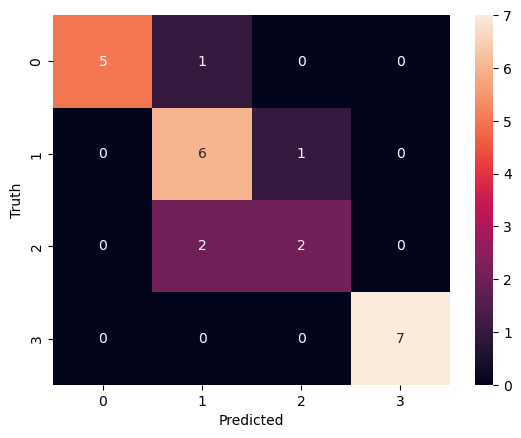

In [21]:
sns.heatmap(cm2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [22]:
print(classification_report(y_test,predict2))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.67      0.86      0.75         7
           2       0.67      0.50      0.57         4
           3       1.00      1.00      1.00         7

    accuracy                           0.83        24
   macro avg       0.83      0.80      0.81        24
weighted avg       0.85      0.83      0.83        24



In [23]:
accuracy_2 = round(accuracy_score(y_test,predict2),4)
precision_2 = round(precision_score(y_test,predict2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,predict2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,predict2, average = 'macro'),4)

In [24]:
print('Accuracy Score  : ', accuracy_2)
print('Precision Score : ', precision_2)
print('Recall Score    : ', recall_2)
print('f1-Score        : ', f1_2)

Accuracy Score  :  0.8333
Precision Score :  0.8333
Recall Score    :  0.7976
f1-Score        :  0.8076


# #Random Forest Classifier

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict3=rf.predict(X_test)

In [26]:
accuracy_3 = accuracy_score(y_test,predict3)
accuracy_3

0.9166666666666666

In [27]:
cm3 = confusion_matrix(y_test,predict3)
cm3

array([[6, 0, 0, 0],
       [0, 6, 1, 0],
       [0, 1, 3, 0],
       [0, 0, 0, 7]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

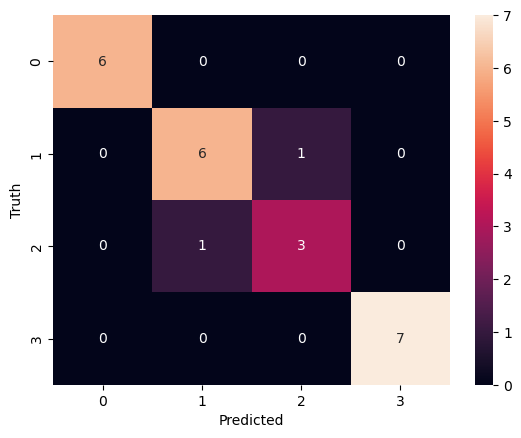

In [28]:
sns.heatmap(cm3,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [29]:
print(classification_report(y_test,predict3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.86      0.86      0.86         7
           2       0.75      0.75      0.75         4
           3       1.00      1.00      1.00         7

    accuracy                           0.92        24
   macro avg       0.90      0.90      0.90        24
weighted avg       0.92      0.92      0.92        24



In [30]:

accuracy_3 = round(accuracy_score(y_test,predict3),4)
precision_3 = round(precision_score(y_test,predict3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,predict3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,predict3, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)

Accuracy Score  :  0.9167
Precision Score :  0.9018
Recall Score    :  0.9018
f1-Score        :  0.9018


# Naive-Bayes Classifier

In [31]:
nb=MultinomialNB()
nb.fit(X_train,y_train)
predict4=nb.predict(X_test)

In [32]:
accuracy_4 = accuracy_score(y_test,predict4)
accuracy_4

0.875

In [33]:
cm4=confusion_matrix(y_test,predict4)
cm4

array([[5, 1, 0, 0],
       [0, 7, 0, 0],
       [1, 1, 2, 0],
       [0, 0, 0, 7]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

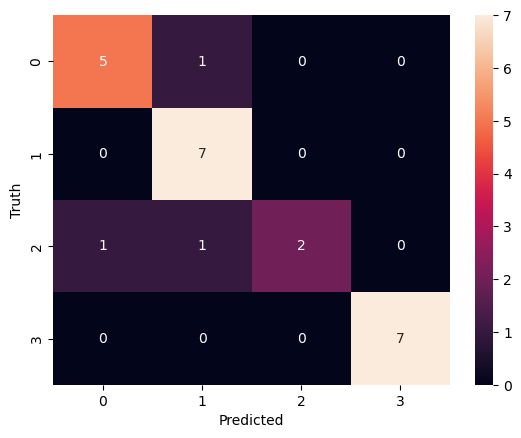

In [34]:
sns.heatmap(cm4,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [35]:
print(classification_report(y_test,predict4))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.78      1.00      0.88         7
           2       1.00      0.50      0.67         4
           3       1.00      1.00      1.00         7

    accuracy                           0.88        24
   macro avg       0.90      0.83      0.84        24
weighted avg       0.89      0.88      0.87        24



In [36]:
accuracy_4 = round(accuracy_score(y_test,predict4),4)
precision_4 = round(precision_score(y_test,predict4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,predict4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,predict4, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)

Accuracy Score  :  0.875
Precision Score :  0.9028
Recall Score    :  0.8333
f1-Score        :  0.8438


# Decision Tree Classifier

In [37]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
predict5=dt.predict(X_test)

In [38]:
accuracy_5 = accuracy_score(y_test,predict5)
accuracy_5

0.9583333333333334

In [39]:
cm5=confusion_matrix(y_test,predict5)
cm5

array([[6, 0, 0, 0],
       [0, 7, 0, 0],
       [0, 1, 3, 0],
       [0, 0, 0, 7]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

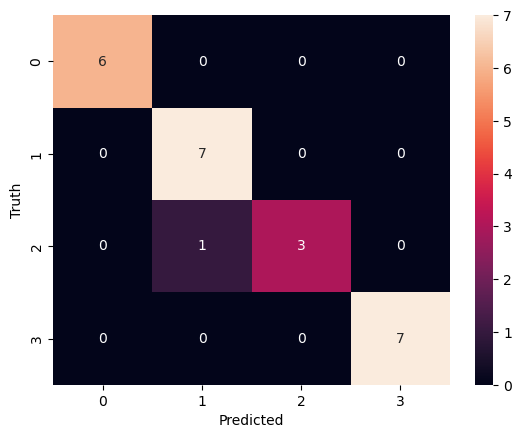

In [40]:
sns.heatmap(cm5,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [41]:
print(classification_report(y_test,predict5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.88      1.00      0.93         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7

    accuracy                           0.96        24
   macro avg       0.97      0.94      0.95        24
weighted avg       0.96      0.96      0.96        24



In [42]:
accuracy_5 = round(accuracy_score(y_test,predict5),4)
precision_5 = round(precision_score(y_test,predict5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,predict5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,predict5, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)

Accuracy Score  :  0.9583
Precision Score :  0.9688
Recall Score    :  0.9375
f1-Score        :  0.9476


# GradientBoosting Classifier

In [43]:
gd = GradientBoostingClassifier()
gd.fit(X_train,y_train)
predict6 = gd.predict(X_test)

In [44]:
accuracy_6 = accuracy_score(y_test,predict6)
accuracy_6

0.9583333333333334

In [45]:
cm6 = confusion_matrix(y_test,predict6)
cm6

array([[6, 0, 0, 0],
       [0, 6, 1, 0],
       [0, 0, 4, 0],
       [0, 0, 0, 7]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

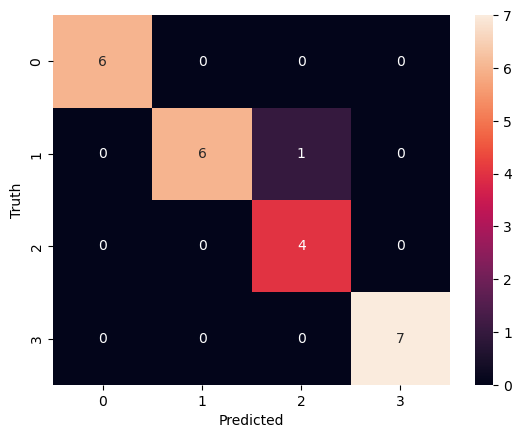

In [46]:
sns.heatmap(cm6,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [47]:
print(classification_report(y_test,predict6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.86      0.92         7
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         7

    accuracy                           0.96        24
   macro avg       0.95      0.96      0.95        24
weighted avg       0.97      0.96      0.96        24



In [48]:
accuracy_6 = round(accuracy_score(y_test,predict6),4)
precision_6 = round(precision_score(y_test,predict6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,predict6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,predict6, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)

Accuracy Score  :  0.9583
Precision Score :  0.95
Recall Score    :  0.9643
f1-Score        :  0.953


# XGBoost Classifier

In [49]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
predict7 = xg.predict(X_test)

In [50]:
accuracy_7 = accuracy_score(y_test,predict7)
accuracy_7

0.9166666666666666

In [51]:
cm7 = confusion_matrix(y_test,predict7)
cm7

array([[6, 0, 0, 0],
       [0, 6, 1, 0],
       [0, 1, 3, 0],
       [0, 0, 0, 7]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

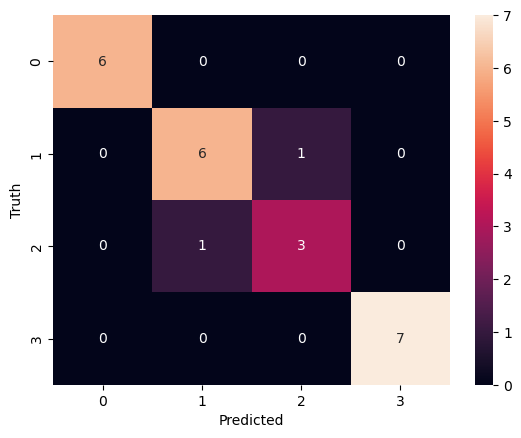

In [52]:
sns.heatmap(cm7,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [53]:
print(classification_report(y_test,predict7))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.86      0.86      0.86         7
           2       0.75      0.75      0.75         4
           3       1.00      1.00      1.00         7

    accuracy                           0.92        24
   macro avg       0.90      0.90      0.90        24
weighted avg       0.92      0.92      0.92        24



In [54]:
accuracy_7 = round(accuracy_score(y_test,predict7),4)
precision_7 = round(precision_score(y_test,predict7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,predict7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,predict7, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)

Accuracy Score  :  0.9167
Precision Score :  0.9018
Recall Score    :  0.9018
f1-Score        :  0.9018


In [55]:
table = {'Classifier' : ['Logistic Regression','SVM Classifier','Random Forest Classifier', 'Naive-Bayes Classifier','Decision Tree Classifier','Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier'], 'Accuracy' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7], 'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7], 'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7], 'F1_Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7]}
table = pd.DataFrame(table)
table.sort_values(["Accuracy"],inplace = True, ignore_index=True)
table

,Classifier,Accuracy,Precision Score,Recall Score,F1_Score
0,SVM Classifier,0.8333,0.8333,0.7976,0.8076
1,Naive-Bayes Classifier,0.8750,0.9028,0.8333,0.8438
2,Logistic Regression,0.9167,0.9444,0.8958,0.9103
3,Random Forest Classifier,0.9167,0.9018,0.9018,0.9018
4,Xtreme Gradient Boosting Classifier,0.9167,0.9018,0.9018,0.9018
5,Decision Tree Classifier,0.9583,0.9688,0.9375,0.9476
6,Gradient Boosting Classifier,0.9583,0.9500,0.9643,0.9530


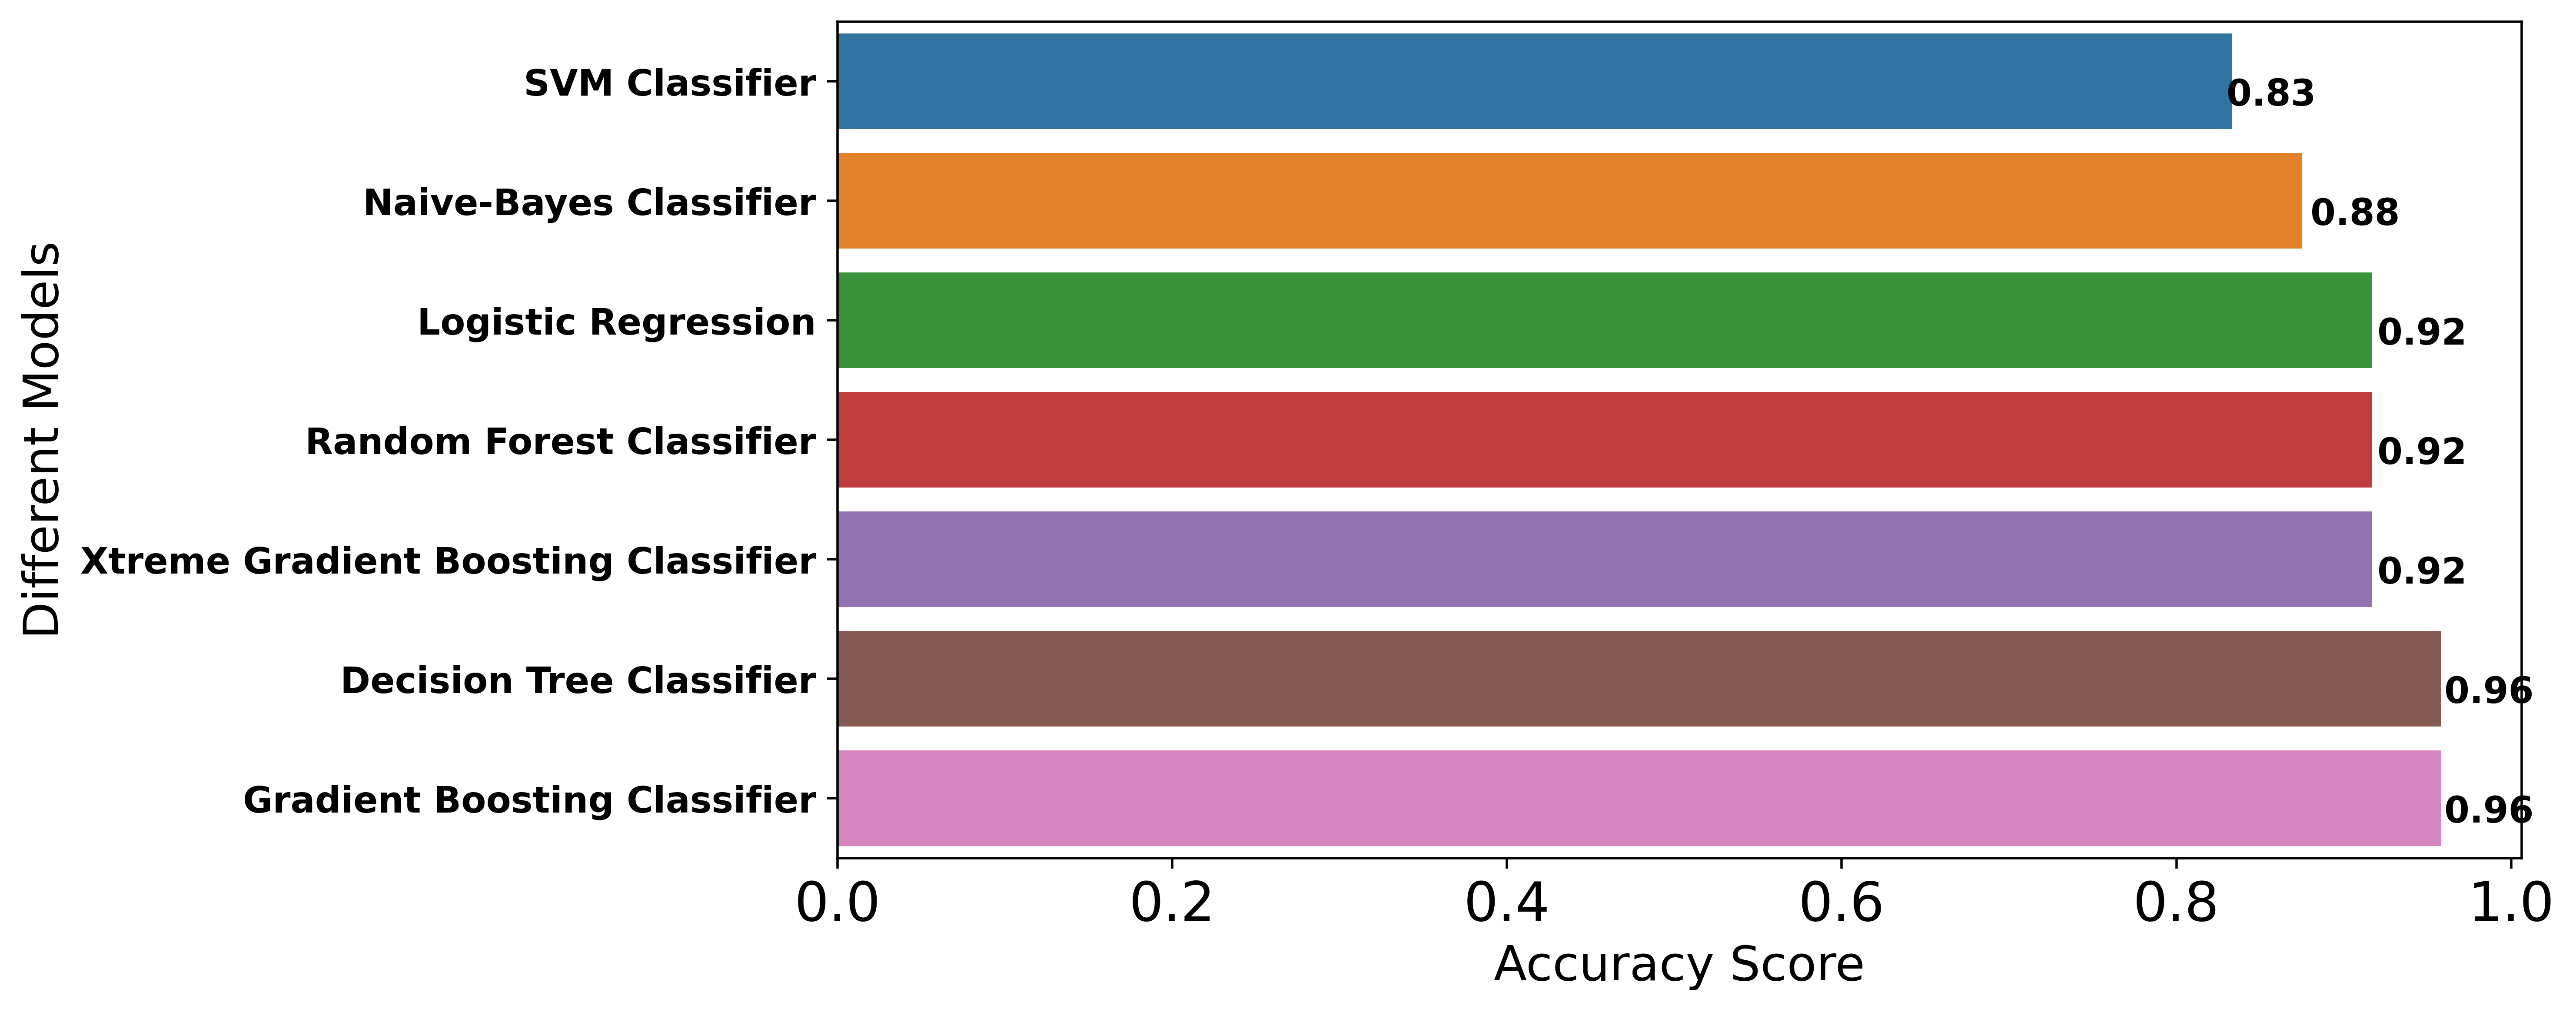

In [56]:
f,axe = plt.subplots(figsize=(10,5),dpi=500)
sns.barplot(x='Accuracy', y='Classifier', data=table, ax = axe)
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('Different Models', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=18)

for i, v in enumerate(np.round(table.Accuracy.values,2)):
    axe.text(v + 0, i + .2, str(v),
            color = 'black', fontweight = 'bold', fontsize= 12)

plt.show()